Set theta0, theta1

In [15]:
t0 = 0.0
t1 = 0.0
learning_rate = 0.1
mse = 0.0

Read data from data.csv

In [9]:
import pandas as pd

df = pd.read_csv('data.csv', dtype=float)
m = len(df)
print(df)

          km   price
0   240000.0  3650.0
1   139800.0  3800.0
2   150500.0  4400.0
3   185530.0  4450.0
4   176000.0  5250.0
5   114800.0  5350.0
6   166800.0  5800.0
7    89000.0  5990.0
8   144500.0  5999.0
9    84000.0  6200.0
10   82029.0  6390.0
11   63060.0  6390.0
12   74000.0  6600.0
13   97500.0  6800.0
14   67000.0  6800.0
15   76025.0  6900.0
16   48235.0  6900.0
17   93000.0  6990.0
18   60949.0  7490.0
19   65674.0  7555.0
20   54000.0  7990.0
21   68500.0  7990.0
22   22899.0  7990.0
23   61789.0  8290.0


Normalize data: Xnormalized = (X - Xmin)/(Xmax - Xmin)

In [10]:
min_mileage = min(df['km'])
min_price = min(df['price'])
max_mileage = max(df['km'])
max_price = max(df['price'])
if max_mileage == min_mileage or max_price == min_price:
    raise ValueError("Can't make predictions on these values. Max price == min price or max mileage == min mileage")
df.insert(0,'km_norm', (df['km'] - min_mileage)/(max_mileage - min_mileage))
df.insert(1,'price_norm', (df['price'] - min_price)/(max_price - min_price))

print(df)

     km_norm  price_norm        km   price
0   1.000000    0.000000  240000.0  3650.0
1   0.538464    0.032328  139800.0  3800.0
2   0.587749    0.161638  150500.0  4400.0
3   0.749103    0.172414  185530.0  4450.0
4   0.705206    0.344828  176000.0  5250.0
5   0.423310    0.366379  114800.0  5350.0
6   0.662830    0.463362  166800.0  5800.0
7   0.304471    0.504310   89000.0  5990.0
8   0.560113    0.506250  144500.0  5999.0
9   0.281440    0.549569   84000.0  6200.0
10  0.272362    0.590517   82029.0  6390.0
11  0.184988    0.590517   63060.0  6390.0
12  0.235379    0.635776   74000.0  6600.0
13  0.343623    0.678879   97500.0  6800.0
14  0.203136    0.678879   67000.0  6800.0
15  0.244706    0.700431   76025.0  6900.0
16  0.116701    0.700431   48235.0  6900.0
17  0.322896    0.719828   93000.0  6990.0
18  0.175264    0.827586   60949.0  7490.0
19  0.197028    0.841595   65674.0  7555.0
20  0.143256    0.935345   54000.0  7990.0
21  0.210045    0.935345   68500.0  7990.0
22  0.00000

Training: calculating theta0, theta1 and mse

mean squared error = sum of squares(observed values - predicted values) / number of datapoints

In [11]:
def mean_squared_error(observed_values, predicted_values, datapoints_amount):
    ssum = 0
    index = 0
    while index < datapoints_amount:
        ssum += (observed_values[index] - predicted_values[index])**2
        index += 1
    return ssum/datapoints_amount

ep = 0
# while ep < 3:
while True:
    ep += 1
    for i, row in df.iterrows():
        array = []
        for n, r in df.iterrows():
            array.insert(len(array), t0 + t1 * r['km_norm'] - r['price_norm'])
        t0 -= learning_rate * sum(array)/m
        t1 -= learning_rate * sum(array * df['km_norm'])/m
    predicted_prices = t0 + t1 * df['km_norm']
    prev_mse = mse
    mse = mean_squared_error(df['price_norm'], predicted_prices, m)
    if abs(mse - prev_mse) < 0.0000001:
        break

print("theta0=", round(t0, 5))
print("theta1=", round(t1, 5))
print("epochs=", ep)

theta0= 0.93841
theta1= -1.00119
epochs= 52


Using trained model

In [16]:
def predict(n_mileage):
    norm_price = t0 + t1 * n_mileage
    predicted_price = norm_price * (max_price - min_price) + min_price
    return predicted_price

mileage = input('Enter mileage: ')
try:
    mileage = float(mileage)
    if mileage <= 0:
        raise ValueError
    norm_mileage = (mileage - min_mileage)/(max_mileage - min_mileage)
    price = predict(norm_mileage)
    print("theta0=", round(t0, 5))
    print("theta1=", round(t1, 5))
    if t0 == 0 and t1 == 0:
        price = 0
    print('predicted price for', mileage, 'mileage', round(price, 2))
except:
    print('not a positive number')

theta0= 0.0
theta1= 0.0
predicted price for 1234567.0 mileage 0


BONUS: graph

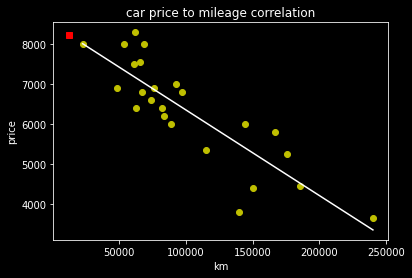

In [13]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.scatter(df['km'], df['price'], color='y', marker='o')
plt.xlabel('km')
plt.ylabel('price')
plt.title('car price to mileage correlation')
x_coordinates = (min_mileage, max_mileage)
y_coordinates = (predict(0), predict(1))
plt.plot(x_coordinates, y_coordinates, 'w')
plt.plot(mileage, price, 'rs')
plt.show()

BONUS: precision of algorithm

In [14]:
pred_prices = []
for d, ro in df.iterrows():
    mile = ro['km']
    normalized_mileage = (mile - min_mileage)/(max_mileage - min_mileage)
    pred_prices.insert(len(pred_prices), round(predict(normalized_mileage), 2))
df['pred-price'] = pred_prices
errors = []
for x, rows in df.iterrows():
    errors.insert(len(errors), round(abs(rows['pred-price'] - rows['price'])*100/max(rows['price'],rows['pred-price']) , 2))
df['error%'] = errors
av_er = 0
for e in errors:
    av_er += e
av_er /= len(errors)
print(df)
print('average error: ', round(av_er, 2), '%')

     km_norm  price_norm        km   price  pred-price  error%
0   1.000000    0.000000  240000.0  3650.0     3358.73    7.98
1   0.538464    0.032328  139800.0  3800.0     5502.80   30.94
2   0.587749    0.161638  150500.0  4400.0     5273.84   16.57
3   0.749103    0.172414  185530.0  4450.0     4524.27    1.64
4   0.705206    0.344828  176000.0  5250.0     4728.20    9.94
5   0.423310    0.366379  114800.0  5350.0     6037.75   11.39
6   0.662830    0.463362  166800.0  5800.0     4925.06   15.09
7   0.304471    0.504310   89000.0  5990.0     6589.82    9.10
8   0.560113    0.506250  144500.0  5999.0     5402.23    9.95
9   0.281440    0.549569   84000.0  6200.0     6696.81    7.42
10  0.272362    0.590517   82029.0  6390.0     6738.98    5.18
11  0.184988    0.590517   63060.0  6390.0     7144.88   10.57
12  0.235379    0.635776   74000.0  6600.0     6910.79    4.50
13  0.343623    0.678879   97500.0  6800.0     6407.94    5.77
14  0.203136    0.678879   67000.0  6800.0     7060.57 